In [ ]:
import math
import os

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import  Model

from PIL import Image
import pickle
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import shutil

In [ ]:
def get_extract_model():
    vgg16_model = VGG16(weights="imagenet")
    extract_model = Model(inputs=vgg16_model.inputs, outputs = vgg16_model.get_layer("fc1").output)
    return extract_model

def image_preprocess(img):
    img = img.resize((224,224))
    img = img.convert("RGB")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def extract_vector(model, image_path):
    print("Xu ly : ", image_path)
    img = Image.open(image_path)
    img_tensor = image_preprocess(img)
    vector = model.predict(img_tensor)[0]
    vector = vector / np.linalg.norm(vector)
    return vector

Vector hóa các hình ảnh. Kết quả thu được là một vector 4096 chiều với mỗi hình ảnh, các vector được lưu vào file vectors.pkl. Các đường dẫn hình ảnh được lưu vào file paths.pkl

In [ ]:
data_folder = "./drive/MyDrive/Image_clustering/dataset"

model = get_extract_model()

vectors = []
paths = []

for image_path in os.listdir(data_folder):
    image_path_full = os.path.join(data_folder, image_path)
    image_vector = extract_vector(model,image_path_full)
    vectors.append(image_vector)
    paths.append(image_path_full)

vector_file = "./drive/MyDrive/Image_clustering/output/vectors.pkl"
path_file = "./drive/MyDrive/Image_clustering/output/paths.pkl"

pickle.dump(vectors, open(vector_file, "wb"))
pickle.dump(paths, open(path_file, "wb"))

553476096/553467096 [==============================] - 5s 0us/step
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4425.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4030.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4355.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4388.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4081.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4426.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4266.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/421.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4172.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4210.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4100.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4370.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4166.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4403.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset/4348.jpg
Xu ly :  ./drive/MyDrive/Image_clustering/dataset

Đọc các file đã thu được ở trên.

In [ ]:
with open("./drive/MyDrive/Image_clustering/output/vectors.pkl", "rb") as f:
    object = pickle.load(f)
    
df = pd.DataFrame(object)

with open("./drive/MyDrive/Image_clustering/output/paths.pkl", "rb") as f:
    object = pickle.load(f)
    
path_df = pd.DataFrame(object)

Ta có được tập dữ liệu gồm 4096 thuộc tính

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,0.000000,0.0,0.001506,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.021604,0.0,0.051676,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.029091,0.006090,0.000000,0.0
2,0.0,0.0,0.0,0.017622,0.0,0.070664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.064080,0.013058,0.006717,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.005398,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027418,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.009712,0.0,0.067401,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089603,0.014520,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,0.0,0.0,0.0,0.000000,0.0,0.000125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.018525,0.000000,0.078538,0.0
4734,0.0,0.0,0.0,0.000000,0.0,0.032870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008730,0.000000,0.000000,0.0
4735,0.0,0.0,0.0,0.019740,0.0,0.047680,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.064047,0.016882,0.000000,0.0
4736,0.0,0.0,0.0,0.060597,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033758,0.037819,0.000264,0.0


In [ ]:
path_df

,0
0,./drive/MyDrive/Image_clustering/dataset/4425.jpg
1,./drive/MyDrive/Image_clustering/dataset/4030.jpg
2,./drive/MyDrive/Image_clustering/dataset/4355.jpg
3,./drive/MyDrive/Image_clustering/dataset/4388.jpg
4,./drive/MyDrive/Image_clustering/dataset/4081.jpg
...,...
4733,./drive/MyDrive/Image_clustering/dataset/1603.jpg
4734,./drive/MyDrive/Image_clustering/dataset/16.jpg
4735,./drive/MyDrive/Image_clustering/dataset/1512.jpg
4736,./drive/MyDrive/Image_clustering/dataset/1675.jpg


Hàm vẽ dendrogram

In [ ]:
def draw_dendrogram(X, title='Dendrogram'):
  dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
  plt.title(str(title))
  plt.xlabel('Các hình ảnh')
  plt.ylabel('Khoảng cách Euclid')
  plt.show()

Dựa vào Dendrogram ta thấy có thể chia tập dữ liệu thành 10 nhóm.

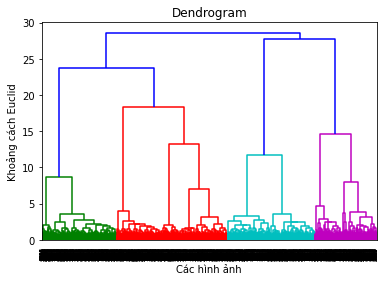

In [ ]:
X = df.values
draw_dendrogram(X, 'Dendrogram')

Huấn luyện mô hình phân cụm kmeans với k=10 và gán nhãn cho các hình ảnh

In [ ]:
random_state=2
X = df.values
k_means = KMeans(n_clusters=10, random_state=random_state)
Y = k_means.fit_predict(X)
labels = pd.DataFrame(Y, columns=['label'])
path_df = path_df.join(labels)

Kết quả sau khi huấn luyện

In [ ]:
path_df

,0,label
0,./drive/MyDrive/Image_clustering/dataset/4425.jpg,3
1,./drive/MyDrive/Image_clustering/dataset/4030.jpg,9
2,./drive/MyDrive/Image_clustering/dataset/4355.jpg,9
3,./drive/MyDrive/Image_clustering/dataset/4388.jpg,6
4,./drive/MyDrive/Image_clustering/dataset/4081.jpg,9
...,...,...
4733,./drive/MyDrive/Image_clustering/dataset/1603.jpg,7
4734,./drive/MyDrive/Image_clustering/dataset/16.jpg,6
4735,./drive/MyDrive/Image_clustering/dataset/1512.jpg,9
4736,./drive/MyDrive/Image_clustering/dataset/1675.jpg,9


Xuất kết quả thành file result.csv

In [ ]:
path_df.to_csv(r'./drive/MyDrive/Image_clustering/output/result.csv')

Tạo các file dể chứa kết quả

In [ ]:
label_values = np.unique(path_df['label'])
for value in label_values:
  os.makedirs('./drive/MyDrive/Image_clustering/output/' + str(value))

Đưa các hình ảnh vào file tương ứng với nhãn của chúng

In [ ]:
for i in range(0, 4738):
  image_path = path_df[0][i]
  target = './drive/MyDrive/Image_clustering/output/' + str(path_df['label'][i])
  shutil.copy(image_path, target)

Qua quan sát ta thấy được:

Nhóm 0: các hình ảnh báo trắng.

Nhóm 1: các hình ảnh hổ trắng.

Nhóm 2: các hình ảnh con cáo.

Nhóm 3: các hình ảnh sư tử đực.

Nhóm 4: các hình ảnh con báo.

Nhóm 5: các hình ảnh con sói.

Nhóm 6: các hình ảnh sư tử cái.

Nhóm 7: các hình ảnh con hổ.

Nhóm 8: các hình ảnh sói trắng.

Nhóm 9: các hình ảnh con báo.

Có 2 nhóm là nhóm 4 và nhóm 9 đều chứa hình ảnh con báo tuy nhiên các hình ảnh các con báo ở nhóm 4 có lông mượt hơn ở nhóm 9.

Liên kết tới file kết quả: https://drive.google.com/drive/folders/1CxmO9Xg3Hlcgg59n5sMfWS4FpEYPoNH-?usp=sharing

Dự đoán cho 1 ảnh bất kì

In [ ]:
search_image = "./drive/MyDrive/Image_clustering/test_image.jpg"

model = get_extract_model()

search_vector = extract_vector(model, search_image)

result = k_means.predict(search_vector.reshape(1, -1))
print('Hinh anh thuoc nhom:', result[0])

Xu ly :  ./drive/MyDrive/Image_clustering/test_image.jpg
Hinh anh thuoc nhom: 3
